#### Importing the dataset

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('HR_Analytics.csv')


####
#### Converting the qualitative data to quantitative 
#### eg: Yes/No to 0/1 

In [34]:
for col in ['OverTime','Over18','MaritalStatus','JobRole','Gender','Attrition','BusinessTravel','Department','EducationField']:
    nom_to_lab = {}
    nom = df[col].unique()
    i = 0
    for nominal in nom:
        nom_to_lab[nominal] = i
        i = i + 1
    for i in range(len(df)):
        df[col][i] = nom_to_lab[df[col][i]]

C:\Users\Isha Desai\AppData\Local\Temp\ipykernel_21100\800636790.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = nom_to_lab[df[col][i]]


In [35]:
df = df.astype(int)

In [36]:
df.info()  # all data is in int format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int32
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int32
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int32
 6   Education                 1470 non-null   int32
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int32
 9   EmployeeNumber            1470 non-null   int32
 10  EnvironmentSatisfaction   1470 non-null   int32
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int32
 13  JobInvolvement            1470 non-null   int32
 14  JobLevel                  1470 non-null 

####
#### Checking the correlation between the variables

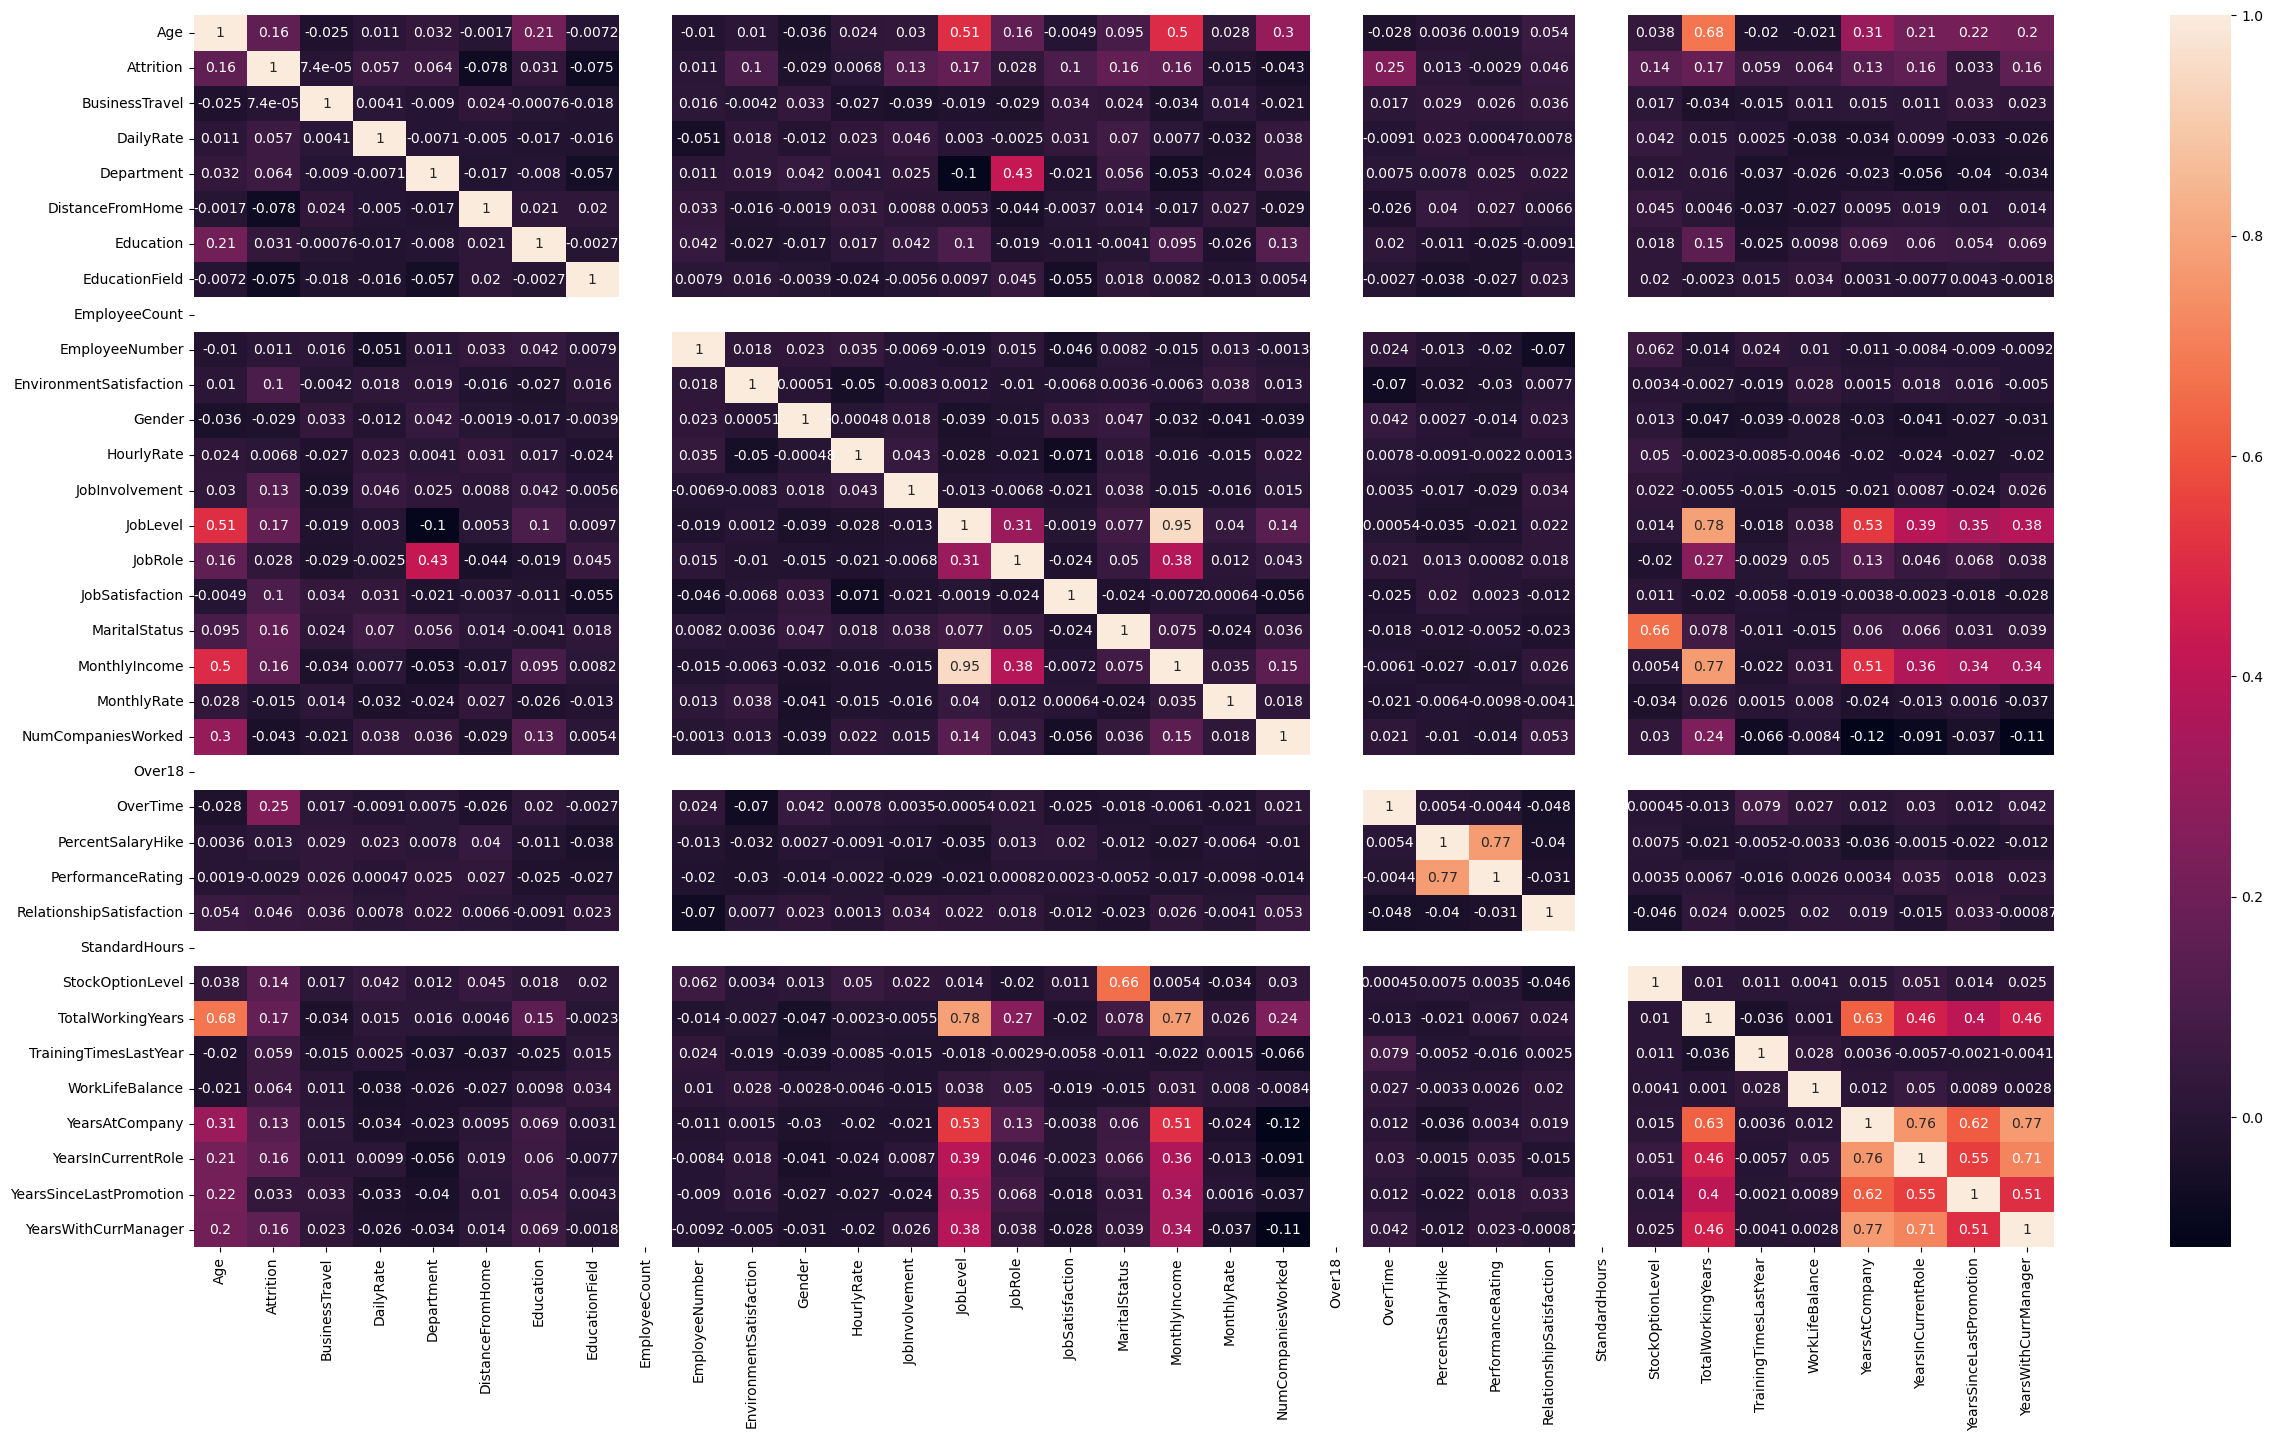

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 16))
ax = sns.heatmap(df.corr(), annot=True)

####
#### Reducing the number of features using Lasso regularization

In [37]:
X = df.iloc[:,df.columns != 'Attrition']
y = df.iloc[:,1] 

In [38]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X, y)


Lasso(alpha=0.001)

In [39]:
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [40]:
l  = get_weights_df(lasso_reg, X, 'Lasso_weight')

In [41]:
l[l['Lasso_weight'] == 0]

,Features,Lasso_weight
9,StandardHours,0.0
10,Over18,0.0
11,EmployeeCount,0.0
12,Education,-0.0
13,BusinessTravel,-0.0


####
#### Normalising the data as features like DailyRate are in 1000s and Department are in 10s

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [43]:
normalised_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.0,0.0,0.715820,0.0,0.000000,0.25,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,0.738095,1.0,0.5,0.126700,0.5,0.250000,0.00,0.0,0.0,0.000484,...,1.000000,0.0,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,0.452381,0.0,0.0,0.909807,0.5,0.035714,0.25,0.2,0.0,0.001451,...,0.333333,0.0,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,0.357143,1.0,0.5,0.923407,0.5,0.071429,0.75,0.0,0.0,0.001935,...,0.666667,0.0,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.214286,1.0,0.0,0.350036,0.5,0.035714,0.00,0.4,0.0,0.002903,...,1.000000,0.0,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,1.0,0.5,0.559771,0.5,0.785714,0.25,0.4,0.0,0.996613,...,0.666667,0.0,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471
1466,0.500000,1.0,0.0,0.365784,0.5,0.178571,0.00,0.4,0.0,0.997097,...,0.000000,0.0,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765
1467,0.214286,1.0,0.0,0.037938,0.5,0.107143,0.50,0.0,0.0,0.998065,...,0.333333,0.0,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471
1468,0.738095,1.0,0.5,0.659270,0.0,0.035714,0.50,0.4,0.0,0.998549,...,1.000000,0.0,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588


In [44]:
d = normalised_df.drop(columns = ['Attrition','EmployeeCount',"EmployeeNumber", "BusinessTravel", "Over18", 'StandardHours', "Education"])

In [45]:
x = []
for i in range(len(d)):
    x.append(list(d.loc[i,:]))

In [46]:
x = np.array(x)
y = np.array(list(df['Attrition']))


####
#### Checking if the dataset is skewed

In [47]:
values = list(np.unique(y, return_counts=True)[1])

<BarContainer object of 2 artists>

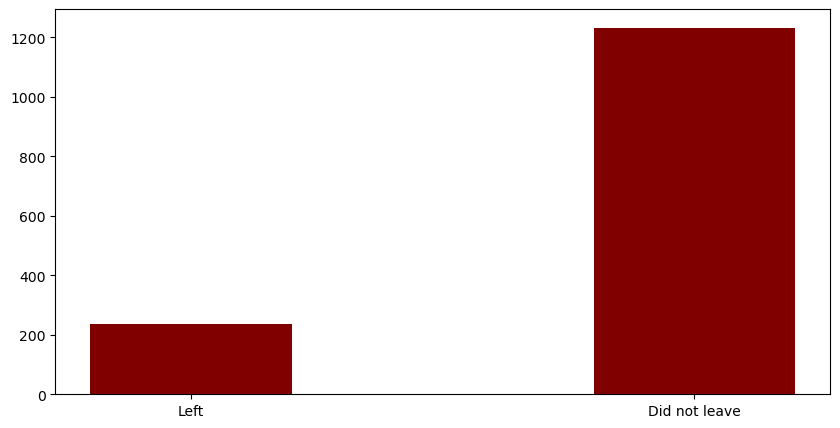

In [48]:

fig = plt.figure(figsize = (10, 5))
attrition = ['Left', 'Did not leave']
# creating the bar plot
plt.bar(attrition, values, color ='maroon', width = 0.4)

####
#### As the dependent variable has more instances of one class the model built will be biased
#### To avoid this we will use Random OverSampling

In [49]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x, y = ros.fit_resample(x, y)

<BarContainer object of 2 artists>

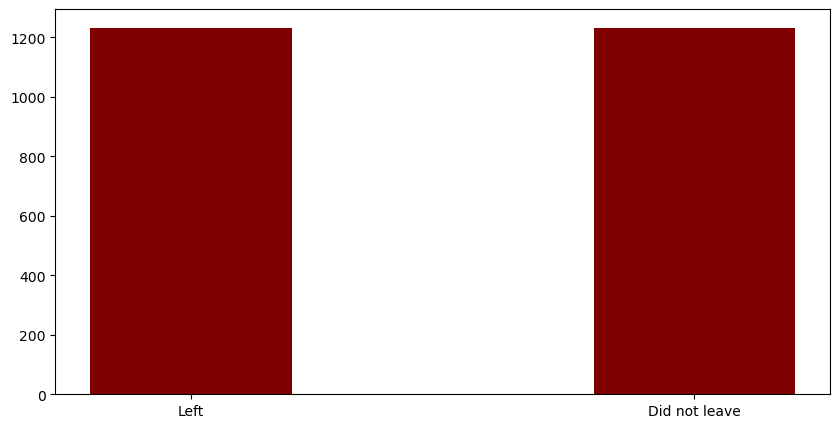

In [50]:
values = list(np.unique(y, return_counts=True)[1])

fig = plt.figure(figsize = (10, 5))
attrition = ['Left', 'Did not leave']
# creating the bar plot
plt.bar(attrition, values, color ='maroon', width = 0.4)

#### 
#### Splitting the data for training and testing

In [51]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0) 

####
#### Training the model using Logistic regression as the problem is that of classification

In [52]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [53]:
y_pred = lr_model.predict(x_test)


In [55]:
from sklearn.metrics import confusion_matrix  
cma= confusion_matrix(y_test, y_pred) 


####
#### Checking the efficiency of model by plotting the confusion matrix and classification report

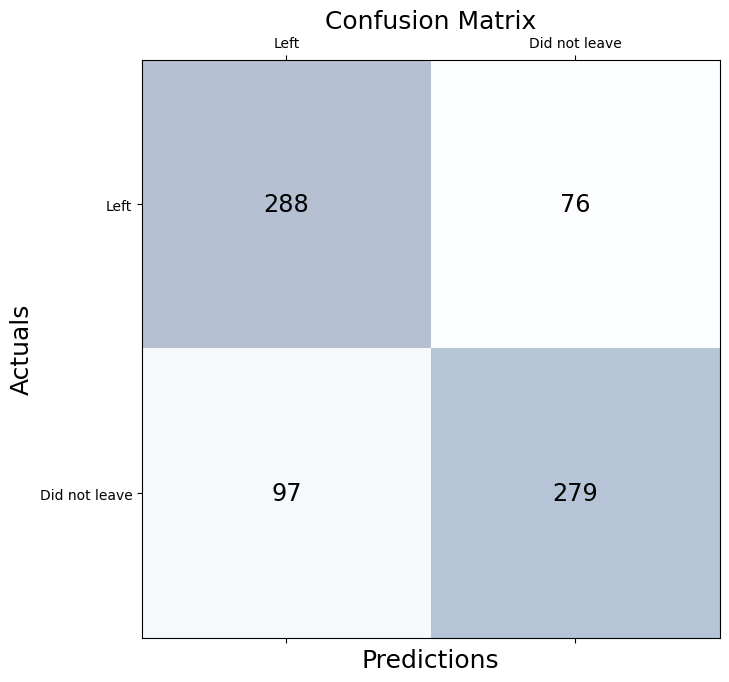

In [56]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
        
        
tick_marks = np.arange(2)
plt.xticks(tick_marks,['Left', 'Did not leave'])
plt.yticks(tick_marks,['Left', 'Did not leave'])
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names = ['Retention', 'Attrition']))

              precision    recall  f1-score   support

   Retention       0.75      0.79      0.77       364
   Attrition       0.79      0.74      0.76       376

    accuracy                           0.77       740
   macro avg       0.77      0.77      0.77       740
weighted avg       0.77      0.77      0.77       740

